In [1]:
import pandas as pd
import os

In [2]:
# Compare runs

run_dict = {
    'Scenario A': r'C:\workspace\sc_18_bike_count_test',
    'Scenario B': r'C:\workspace\sc_18_bike_count_test',
    'Scenario C': r'C:\workspace\sc_18_bike_count_test'
}

In [3]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in run_dict.items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [4]:
geog = 'rg'

# Population

In [5]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='Persons')

source,Scenario A,Scenario B,Scenario C
hh_rg_proposed,,,
Cities and Towns,"371,926","371,926","371,926"
Core Cities,"686,747","686,747","686,747"
HCT Communities,"921,557","921,557","921,557"
Metropolitan Cities,"993,114","993,114","993,114"
Rural,"844,633","844,633","844,633"
Urban Unincorporated,"167,640","167,640","167,640"


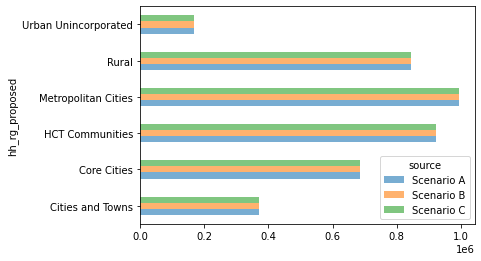

In [6]:
df.plot(kind='barh', alpha=0.6)
# df.to_csv(os.path.join(scen_path,r'outputs\compare\inputs',fname)
df

# Employment

In [7]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='Workers')
df

source,Scenario A,Scenario B,Scenario C
hh_rg_proposed,,,
Cities and Towns,"181,281","181,281","181,281"
Core Cities,"328,177","328,177","328,177"
HCT Communities,"464,248","464,248","464,248"
Metropolitan Cities,"478,234","478,234","478,234"
Rural,"416,314","416,314","416,314"
Urban Unincorporated,"84,650","84,650","84,650"


# Transit Ridership

source,Scenario A,Scenario B,Scenario C
hh_rg_proposed,,,
Cities and Towns,"39,823","39,823","39,823"
Core Cities,"59,434","59,434","59,434"
HCT Communities,"128,279","128,279","128,279"
Metropolitan Cities,"94,891","94,891","94,891"
Rural,"120,067","120,067","120,067"
Urban Unincorporated,"23,121","23,121","23,121"


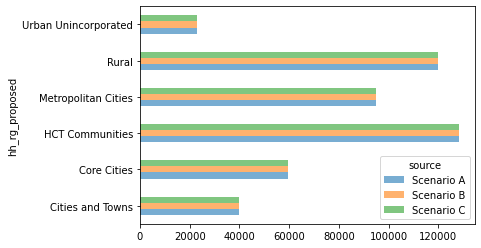

In [8]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6)
df

## Transit Commute Mode Share

source,Scenario A,Scenario B,Scenario C
hh_rg_proposed,,,
Cities and Towns,5.6%,5.6%,5.6%
Core Cities,5.2%,5.2%,5.2%
HCT Communities,6.6%,6.6%,6.6%
Metropolitan Cities,5.4%,5.4%,5.4%
Rural,6.9%,6.9%,6.9%
Urban Unincorporated,6.6%,6.6%,6.6%


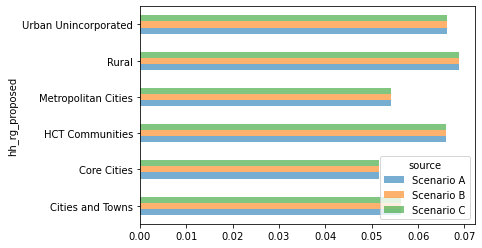

In [9]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6)
df

# VMT

source,Scenario A,Scenario B,Scenario C
hh_rg_proposed,,,
Cities and Towns,"5,875,682","5,875,682","5,875,682"
Core Cities,"11,665,359","11,665,359","11,665,359"
HCT Communities,"14,401,509","14,401,509","14,401,509"
Metropolitan Cities,"16,709,126","16,709,126","16,709,126"
Rural,"13,109,361","13,109,361","13,109,361"
Urban Unincorporated,"2,614,367","2,614,367","2,614,367"
Total,"64,375,404","64,375,404","64,375,404"


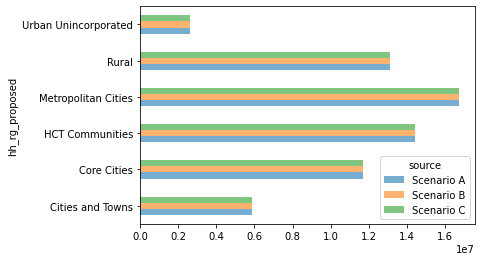

In [10]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6)
df.loc['Total'] = df.sum(axis=0)
df

# Delay